# Portfolio Part 3 - Analysis of Loan Approval Data (2024 S2)

## Task background
In this Portfolio task, you will work on a new dataset named 'Loan Approval' which is a modified version from a synthetic Dataset for Risk Assessment and Loan Approval Modeling (many thanks to LORENZO ZOPPELLETTO for the sharing of this dataset). This dataset comprises 20,000 records of personal and financial data, designed to facilitate the development of predictive models for risk assessment and loan approval. In this portfolio part, you are mainly required to train classification models to determine the outcome of loan approval, indicating whether an applicant is likely to be approved or denied for a loan.

The dataset includes diverse features such as demographic information, credit history, employment status, income levels, existing debt, and other relevant financial metrics, providing a comprehensive foundation for sophisticated data-driven analysis and decision-making.

The dataset includes the following columns:

|Column|Meaning|
|:-----|:-----|
|ApplicationDate| Loan application date|
|Age| Applicant's age|
|AnnualIncome| Yearly income|
|CreditScore| Creditworthiness score|
|EmploymentStatus| Job situation|
|EducationLevel| Highest education attained|
|Experience| Work experience|
|LoanAmount| Requested loan size|
|LoanDuration| Loan repayment period|
|MaritalStatus| Applicant's marital state|
|NumberOfDependents| Number of dependents|
|HomeOwnershipStatus| Homeownership type|
|MonthlyDebtPayments| Monthly debt obligations|
|CreditCardUtilizationRate| Credit card usage percentage|
|NumberOfOpenCreditLines| Active credit lines|
|NumberOfCreditInquiries| Credit checks count|
|DebtToIncomeRatio| Debt to income proportion|
|BankruptcyHistory| Bankruptcy records|
|LoanPurpose| Reason for loan|
|PreviousLoanDefaults| Prior loan defaults|
|PaymentHistory| Past payment behavior|
|LengthOfCreditHistory| Credit history duration|
|SavingsAccountBalance| Savings account amount|
|CheckingAccountBalance| Checking account funds|
|TotalAssets| Total owned assets|
|TotalLiabilities| Total owed debts|
|MonthlyIncome| Income per month|
|UtilityBillsPaymentHistory| Utility payment record|
|JobTenure| Job duration|
|NetWorth| Total financial worth|
|BaseInterestRate| Starting interest rate|
|InterestRate| Applied interest rate|
|MonthlyLoanPayment| Monthly loan payment|
|TotalDebtToIncomeRatio| Total debt against income|
|LoanApproved| Loan approval status|
|RiskScore| Risk assessment score|

## Task Description
Your high level goal in this notebook is to build and evaluate predictive models for 'loan approval' from other available features. More specifically, you need to complete the following major tasks:

1. Clean and preprocess the dataset for the downstream data analysis tasks.

2. Build and evaluate logistic regression models with this datasets.

3. Build and evaluate KNN models with this datasets.

Note 1: While the main steps of each task have been given with the requirements, you should learn how to properly organise and comment your notebook by yourself to ensure that your notebook file is professional and readable.

Note 2: You will be evaluated on the accuracy of the model, the process that you produce the results,  and your clear description and justification of your implementation. So, try your best to comment your source code to showing your understanding and critical thinking.


## Load the dataset and show the basic information

In [89]:
import pandas as pd
import numpy as np

data = pd.read_csv('loan_approval.csv')
data.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45.0,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,NaN
1,2018-01-02,38.0,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47.0,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,NaN
3,2018-01-04,58.0,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,NaN
4,2018-01-05,37.0,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,NaN


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         19900 non-null  float64
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               19900 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [91]:
data.describe(include="all")

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000,19900.000000,20000.000000,20000.000000,20000,20000,20000.000000,20000.000000,20000.000000,19900,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,1000.000000
unique,20000,NaN,NaN,NaN,3,5,NaN,NaN,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2018-01-01,NaN,NaN,NaN,Employed,Bachelor,NaN,NaN,NaN,Married,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,17036,6054,NaN,NaN,NaN,9999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,39.751759,59161.473550,571.612400,NaN,NaN,17.522750,24882.867800,54.057000,NaN,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.687600
std,NaN,11.630809,40350.845168,50.997358,NaN,NaN,11.316836,13427.421217,24.664857,NaN,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.881033
min,NaN,18.000000,15000.000000,343.000000,NaN,NaN,0.000000,3674.000000,12.000000,NaN,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,30.400000
25%,NaN,31.750000,31679.000000,540.000000,NaN,NaN,9.000000,15575.000000,36.000000,NaN,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,NaN,40.000000,48566.000000,578.000000,NaN,NaN,17.000000,21914.500000,48.000000,NaN,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,NaN,48.000000,74391.000000,609.000000,NaN,NaN,25.000000,30835.000000,72.000000,NaN,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000


## Task 1: Clean the datasets (10 marks)

### Step 1.1 Handle the missing values with follwoing rules (5 marks)
1. If over 50% of the values of a column are missing, the column should be removed from the data frame; 
2. For a categorical column, if a row contains a missing value, you need to delete the whole row; 
3. For a numerical column, if a row contains a missing value, you need to perform a missing value imputation with the average value of the column.

In [94]:
# Step 1.1-1 - Removing columns with more than 50% data missing

columns_to_drop = data.columns[data.isnull().sum() > (data.count()/2)]
data_clean = data.drop(columns_to_drop, axis=1)

data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         19900 non-null  float64
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               19900 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [95]:
# Step 1.1-2 - Removing missing records for categorical columns

categorical_columns = data_clean.select_dtypes(include='object').columns
for column in categorical_columns:
    data_clean = data_clean.drop(data_clean.index[data_clean[column].isnull()])

data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19900 entries, 0 to 19999
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             19900 non-null  object 
 1   Age                         19800 non-null  float64
 2   AnnualIncome                19900 non-null  int64  
 3   CreditScore                 19900 non-null  int64  
 4   EmploymentStatus            19900 non-null  object 
 5   EducationLevel              19900 non-null  object 
 6   Experience                  19900 non-null  int64  
 7   LoanAmount                  19900 non-null  int64  
 8   LoanDuration                19900 non-null  int64  
 9   MaritalStatus               19900 non-null  object 
 10  NumberOfDependents          19900 non-null  int64  
 11  HomeOwnershipStatus         19900 non-null  object 
 12  MonthlyDebtPayments         19900 non-null  int64  
 13  CreditCardUtilizationRate   19900 no

In [96]:
# Step 1.1-3 - Replacing missing value for numerical column with its average value

numerical_columns = data_clean.columns.difference(categorical_columns)
for column in numerical_columns:
    if(data_clean[column].isnull().sum()):
        rows_to_replace = data_clean.index[(data_clean[column].isnull())]
        for row in rows_to_replace:
            data_clean.loc[row,column] = round(data_clean[column].mean()) 

data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19900 entries, 0 to 19999
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             19900 non-null  object 
 1   Age                         19900 non-null  float64
 2   AnnualIncome                19900 non-null  int64  
 3   CreditScore                 19900 non-null  int64  
 4   EmploymentStatus            19900 non-null  object 
 5   EducationLevel              19900 non-null  object 
 6   Experience                  19900 non-null  int64  
 7   LoanAmount                  19900 non-null  int64  
 8   LoanDuration                19900 non-null  int64  
 9   MaritalStatus               19900 non-null  object 
 10  NumberOfDependents          19900 non-null  int64  
 11  HomeOwnershipStatus         19900 non-null  object 
 12  MonthlyDebtPayments         19900 non-null  int64  
 13  CreditCardUtilizationRate   19900 no

### Step 1.2 Handle categorical attributes (5 marks)
1. If all the categorical values of a column are unique, this column does not provide any statistical informaiton and should be deleted.
2. Use one hot encoding to convert the categorical values into numerical ones.

In [98]:
# Step 1.2-1 - deleting categorical columns with all unique values

for column in categorical_columns:
    if data_clean[column].nunique() == data_clean[column].count():
        data_clean = data_clean.drop(data_clean[column].name,axis=1)
        
# resetting the categorical_columns after deleting 'ApplicationDate' key
categorical_columns = data_clean.select_dtypes(include='object').columns

data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19900 entries, 0 to 19999
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         19900 non-null  float64
 1   AnnualIncome                19900 non-null  int64  
 2   CreditScore                 19900 non-null  int64  
 3   EmploymentStatus            19900 non-null  object 
 4   EducationLevel              19900 non-null  object 
 5   Experience                  19900 non-null  int64  
 6   LoanAmount                  19900 non-null  int64  
 7   LoanDuration                19900 non-null  int64  
 8   MaritalStatus               19900 non-null  object 
 9   NumberOfDependents          19900 non-null  int64  
 10  HomeOwnershipStatus         19900 non-null  object 
 11  MonthlyDebtPayments         19900 non-null  int64  
 12  CreditCardUtilizationRate   19900 non-null  float64
 13  NumberOfOpenCreditLines     19900 no

In [99]:
# Step 1.2-2 - Using one hot encoding to convert the categorical values into numerical ones
# Using index for correctly aligning all values during join

from sklearn.preprocessing import OneHotEncoder

# EmploymentStatus
one_employment_status = OneHotEncoder()
one_employment_status_result = one_employment_status.fit_transform(data_clean[['EmploymentStatus']])
data_clean = data_clean.join(pd.DataFrame(one_employment_status_result.toarray(), 
                                          columns=one_employment_status.get_feature_names_out(['EmploymentStatus']), 
                                          index=data_clean.index))

# EducationLevel
one_education_level = OneHotEncoder()
one_education_level_result = one_education_level.fit_transform(data_clean[['EducationLevel']])
data_clean = data_clean.join(pd.DataFrame(
                                one_education_level_result.toarray(), 
                                columns = one_education_level.get_feature_names_out(['EducationLevel']),
                                index=data_clean.index))

# MaritalStatus
one_marital_status = OneHotEncoder()
one_marital_status_result = one_marital_status.fit_transform(data_clean[['MaritalStatus']])
data_clean = data_clean.join(pd.DataFrame(
                                one_marital_status_result.toarray(), 
                                columns = one_marital_status.get_feature_names_out(['MaritalStatus']),
                                index=data_clean.index))

# HomeOwnershipStatus
one_home_ownership_status = OneHotEncoder()
one_home_ownership_status_result = one_home_ownership_status.fit_transform(data_clean[['HomeOwnershipStatus']])
data_clean = data_clean.join(pd.DataFrame(
                                one_home_ownership_status_result.toarray(), 
                                columns = one_home_ownership_status.get_feature_names_out(['HomeOwnershipStatus']),
                                index=data_clean.index))

# LoanPurpose
one_loan_purpose = OneHotEncoder()
one_loan_purpose_result = one_loan_purpose.fit_transform(data_clean[['LoanPurpose']])
data_clean = data_clean.join(pd.DataFrame(
                                one_loan_purpose_result.toarray(), 
                                columns = one_loan_purpose.get_feature_names_out(['LoanPurpose']),
                                index=data_clean.index))

data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19900 entries, 0 to 19999
Data columns (total 55 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             19900 non-null  float64
 1   AnnualIncome                    19900 non-null  int64  
 2   CreditScore                     19900 non-null  int64  
 3   EmploymentStatus                19900 non-null  object 
 4   EducationLevel                  19900 non-null  object 
 5   Experience                      19900 non-null  int64  
 6   LoanAmount                      19900 non-null  int64  
 7   LoanDuration                    19900 non-null  int64  
 8   MaritalStatus                   19900 non-null  object 
 9   NumberOfDependents              19900 non-null  int64  
 10  HomeOwnershipStatus             19900 non-null  object 
 11  MonthlyDebtPayments             19900 non-null  int64  
 12  CreditCardUtilizationRate       19900

In [100]:
# Removing original categorical columns
data_clean = data_clean.drop(data_clean[categorical_columns],axis=1)

## Task 2: Build a logistic regression classification model (25 marks)

### Step 2.1 Specify the features and the label, and split the dataset into training data and testing data (5 marks)
1. The attirbute "LoanApproved" is the label, which is the prediction target. The remaining attributes are the features.
2. The ratio for splitting the dataset is 80% for training and 20% for testing. Note that you need to set the "random_state" parameter as your student ID to produce your personlised splitting. Failing to do so will lose marks.

In [103]:
# Step 2.1- specifying feature and target variables

feature_cols = data_clean.columns.difference(['LoanApproved'])

# Checking for data imbalances of target variable
count_loan_approved = sum(data_clean['LoanApproved'] == 1)
count_loan_not_approved = sum(data_clean['LoanApproved'] == 0 )

print("Count of loan approved: ",count_loan_approved)
print("Count of loan not approved: ",count_loan_not_approved)

Count of loan approved:  4740
Count of loan not approved:  15160


In [104]:
# Step 2.1- splitting the data and seperating into features and target variables

from sklearn.model_selection import train_test_split
train_logreg, test_logreg =  train_test_split(data_clean, test_size = 0.2, random_state = 48657360)

X_train_logreg = train_logreg[feature_cols]
y_train_logreg = train_logreg['LoanApproved']

X_test_logreg = test_logreg[feature_cols]
y_test_logreg = test_logreg['LoanApproved']

### Step 2.2 Build a logistic regression model (10 marks)
1. Train a logistic regression model
2. Report two classification performance metrics (accuracy and f1-score) on the testing data
3. Also report the two metrics on the training data, and compare the results with that of the testing data. Make a justification on whether the model is overfitting based on the comparison.

In [106]:
# Using the logistic regression model simply,for prediction gives convergence warning, where maximum number of iteration reaches limit. 
# So, a better approach would be to first scale the data for standarization.

In [107]:
# Step 2.2 - Using standard scaler only on training data to prevent data leakage.
# Then using it to standarize both training and testing data.

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_logreg_scaled = pd.DataFrame(sc.fit_transform(X_train_logreg), columns=X_train_logreg.columns)
X_train_logreg_scaled

,Age,AnnualIncome,BankruptcyHistory,BaseInterestRate,CheckingAccountBalance,CreditCardUtilizationRate,CreditScore,DebtToIncomeRatio,EducationLevel_Associate,EducationLevel_Bachelor,...,NumberOfCreditInquiries,NumberOfDependents,NumberOfOpenCreditLines,PaymentHistory,PreviousLoanDefaults,SavingsAccountBalance,TotalAssets,TotalDebtToIncomeRatio,TotalLiabilities,UtilityBillsPaymentHistory
0,0.534930,0.688224,-0.23423,-1.462559,-0.005508,-0.147938,1.066424,0.031585,-0.501276,-0.654849,...,0.004261,-0.379626,-1.168961,-1.412781,-0.330885,0.428674,1.444076,-0.785704,2.843572,-1.172423
1,0.706551,1.156289,-0.23423,-0.860561,-0.169962,-1.295382,0.283030,-0.748461,-0.501276,1.527068,...,0.004261,-0.379626,0.563209,-0.403833,-0.330885,1.974807,-0.500429,-0.391737,-0.185790,0.174073
2,-1.267090,0.283521,-0.23423,0.521469,1.281679,-0.550312,-1.910475,-0.007321,1.994911,-0.654849,...,1.016716,1.065186,-0.591571,1.412273,-0.330885,0.000342,-0.223074,-0.904662,0.654979,0.663146
3,0.449120,-0.116035,-0.23423,-0.696748,-0.034399,-0.421217,1.086009,-0.538063,-0.501276,1.527068,...,-1.008194,-0.379626,-0.591571,-0.202043,-0.330885,-0.553046,0.563142,-0.820341,-0.463033,-1.279171
4,-0.494795,0.206743,-0.23423,0.428396,-0.533095,-0.852648,0.283030,1.431418,-0.501276,-0.654849,...,1.016716,-0.379626,-0.014181,-1.009201,-0.330885,0.021638,-0.334187,-0.405289,-0.430128,1.094686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15915,-1.009658,-1.042270,-0.23423,-0.211365,-0.405532,-0.723824,0.420124,-0.922488,-0.501276,-0.654849,...,0.004261,1.065186,-1.168961,0.806905,-0.330885,-0.290851,0.329483,0.456318,-0.485409,0.923928
15916,-0.065743,0.537616,-0.23423,0.181256,-0.097514,2.568782,-0.578705,-1.064203,-0.501276,-0.654849,...,0.004261,1.065186,0.563209,1.412273,-0.330885,0.040970,-0.568811,-0.887952,-0.543934,-1.292805
15917,-1.524521,-0.909476,-0.23423,-0.926936,1.318570,0.013390,0.811821,0.802433,-0.501276,1.527068,...,3.041626,-1.102032,-0.591571,2.623011,-0.330885,-0.529183,-0.697208,3.655781,-0.042847,-0.873587
15918,0.020067,0.106154,-0.23423,1.146108,-0.309082,-1.216293,-0.989987,0.463538,-0.501276,1.527068,...,2.029171,-1.102032,-0.014181,-0.202043,-0.330885,-0.302632,-0.279871,-0.474710,-0.080231,0.013683


In [108]:
# Transforming the test data using the fitted scaler

X_test_logreg_scaled = pd.DataFrame(sc.transform(X_test_logreg), columns=X_test_logreg.columns)
X_test_logreg_scaled

,Age,AnnualIncome,BankruptcyHistory,BaseInterestRate,CheckingAccountBalance,CreditCardUtilizationRate,CreditScore,DebtToIncomeRatio,EducationLevel_Associate,EducationLevel_Bachelor,...,NumberOfCreditInquiries,NumberOfDependents,NumberOfOpenCreditLines,PaymentHistory,PreviousLoanDefaults,SavingsAccountBalance,TotalAssets,TotalDebtToIncomeRatio,TotalLiabilities,UtilityBillsPaymentHistory
0,0.191688,-0.053748,-0.23423,-1.293902,-0.733551,1.527410,1.086009,0.890414,-0.501276,-0.654849,...,1.016716,-0.379626,-0.014181,-0.403833,-0.330885,0.054412,-0.027788,0.023124,0.287772,1.046941
1,-0.580606,0.048240,-0.23423,-0.878894,-0.444201,-0.242088,0.890161,-0.263481,-0.501276,-0.654849,...,0.004261,1.065186,1.140599,-0.202043,3.022197,-0.618897,0.487754,-0.902018,-0.073303,-0.101537
2,-0.494795,1.218001,-0.23423,-0.075376,-0.489981,-0.227239,-0.970402,0.018553,-0.501276,-0.654849,...,1.016716,-1.102032,-0.014181,-0.605622,-0.330885,0.286702,-0.570194,-0.699823,-0.610686,0.396395
3,0.363309,0.837433,-0.23423,1.349712,2.579978,-0.367169,-2.321758,1.040923,1.994911,-0.654849,...,2.029171,1.065186,-0.014181,-0.403833,-0.330885,0.617315,1.095213,-0.916954,-0.483379,-0.627775
4,-0.408985,0.486897,-0.23423,0.563541,0.744314,-0.709126,-1.048741,1.114430,-0.501276,-0.654849,...,-1.008194,0.342780,-0.014181,0.201536,-0.330885,0.281114,0.494862,-0.764365,-0.423451,0.099636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3975,-1.181279,0.155599,-0.23423,-0.512153,0.020271,-0.971600,-0.069498,1.112795,-0.501276,1.527068,...,0.004261,-0.379626,1.140599,-1.614570,-0.330885,-0.596695,0.427134,-0.308242,-0.008079,-2.240606
3976,1.564656,0.952263,-0.23423,0.975677,-0.688215,-1.506249,-1.636287,0.534044,-0.501276,1.527068,...,1.016716,0.342780,-0.014181,-0.403833,3.022197,0.203936,-0.196176,-0.764151,-0.620775,-2.186616
3977,-0.237364,0.341760,-0.23423,0.633972,0.952326,-0.103571,-1.068326,-1.183138,-0.501276,-0.654849,...,0.004261,-1.102032,-1.168961,-0.807412,-0.330885,1.238668,-0.029808,-0.508631,-0.324736,1.000642
3978,-0.065743,-1.099286,-0.23423,-0.374023,0.752759,-1.740617,-0.892062,1.910147,-0.501276,-0.654849,...,-1.008194,0.342780,-0.014181,-0.807412,-0.330885,-0.341146,-0.526464,5.870674,-0.476094,-0.343460


In [109]:
# Step 2.2 - 1 - training model on scaled data and using testing data for testing model prediction

from sklearn.linear_model import LogisticRegression

model_logreg = LogisticRegression()
model_logreg.fit(X_train_logreg_scaled,y_train_logreg) 

y_pred_logreg = model_logreg.predict(X_test_logreg_scaled)

In [110]:
# Step 2.2-2

from sklearn.metrics import accuracy_score, f1_score

accuracy = accuracy_score(y_test_logreg,y_pred_logreg)
f1 = f1_score(y_test_logreg,y_pred_logreg)

print("The accuracy of this logistic regression model is ",accuracy)
print("The f1-score of this logistic regression model is ",f1)

The accuracy of this logistic regression model is  0.9695979899497488
The f1-score of this logistic regression model is  0.9372080954852102


In [111]:
# Step 2.2-3
# Using training data for model testing and prediction

y_train_pred_logreg = model_logreg.predict(X_train_logreg_scaled)

accuracy_train = accuracy_score(y_train_logreg, y_train_pred_logreg)
f1_train = f1_score(y_train_logreg, y_train_pred_logreg)

print("The accuracy of this logistic regression model for training data is ",accuracy_train)
print("The f1-score of this logistic regression model for training data is ",f1_train)

The accuracy of this logistic regression model for training data is  0.9653266331658291
The f1-score of this logistic regression model for training data is  0.926242650988776


Text(0.5, 1.0, 'Confusion matrix of predicted vs actual values of testing dataset')

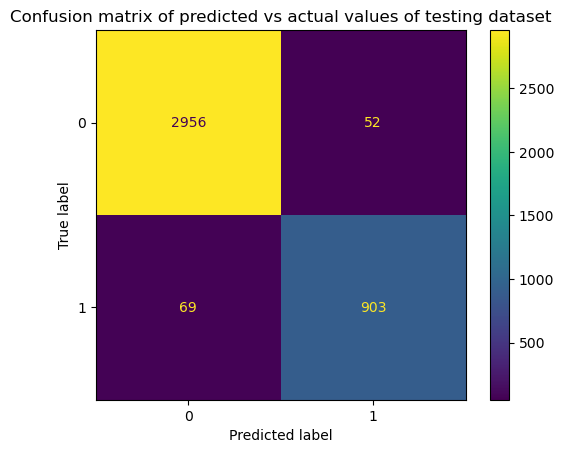

In [112]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# confusion matrix for testing data

cm_logreg = confusion_matrix(y_test_logreg, y_pred_logreg, labels=model_logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=model_logreg.classes_)
disp.plot()
disp.ax_.set_title("Confusion matrix of predicted vs actual values of testing dataset")

Text(0.5, 1.0, 'Confusion matrix of predicted vs actual values of training dataset')

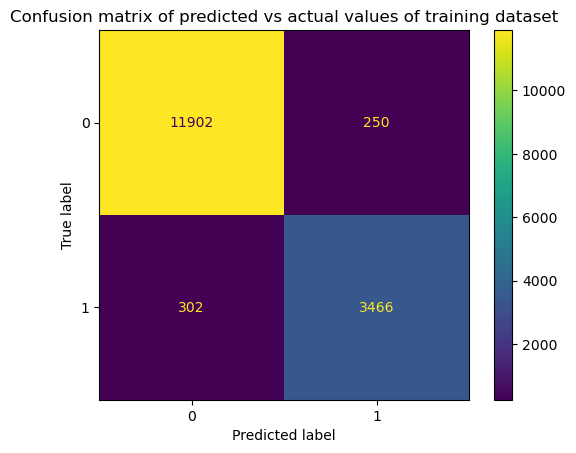

In [113]:
# confusion matrix for training data

cm_logreg_train = confusion_matrix(y_train_logreg,y_train_pred_logreg, labels=model_logreg.classes_)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_logreg_train)
disp_train.plot()
disp_train.ax_.set_title("Confusion matrix of predicted vs actual values of training dataset")

In [114]:
# Calculation of Precision and Recall for testing dataset
from sklearn.metrics import precision_score,recall_score

precision = precision_score(y_test_logreg,y_pred_logreg)
recall = recall_score(y_test_logreg, y_pred_logreg)

print("Precision of testing dataset: ", precision)
print("Recall of testing dataset: ", recall)

Precision of testing dataset:  0.9455497382198953
Recall of testing dataset:  0.9290123456790124


In [115]:
# Calculation of Precision and Recall for training dataset

precision_train = precision_score(y_train_logreg, y_train_pred_logreg)
recall_train = recall_score(y_train_logreg, y_train_pred_logreg)

print("Precision of training dataset: ", precision_train)
print("Recall of training dataset: ", recall_train)

Precision of training dataset:  0.9327233584499461
Recall of training dataset:  0.9198513800424628


## Analysis and Interpretation

The accuracy of the model for both testing and training dataset is quite high, 96.95% and 96.53% respectively, suggesting a good model. However, as the dataset is imbalanced, with only 4740 loan approvals out of 19900 records, using accuracy as a performance metric can be misleading. In such cases, Precision, Recall and F1-score are better metrics for evaluating model's performance. 

Examining the confusion matrix for testing dataset, we find that most of the records are correctly classified, with only 121 misclassified out of 3980. Likewise, for training dataset, only 552 out of 15920 are misclassified. These metrics are supported by the Precision and Recall score of both the dataset. Precision score for testing data indicates that 94.55% of data classified for loan approval are indeed correct. Similarly, the recall score for testing data suggest out of all actual loan approved records, 92.90% were correctly classified as loan approved. This indicates that the model's performance is quite good for predicting both loan approvals and loan denials.

These findings are further supported by the high F1-score for both testing (93.72%) and training (92.62%) dataset. Since the difference in f1-score of training and testing dataset is quite low, we can conclude that the model is not overfitting and performs well even for unseen data.

### Step 2.3 Perform the recursive feature elimination (RFE) technique to identify the effective features for building the model (10 marks)
1. Visulise the change of the two performance metrics with respect to the number of eliminated features using a line chart.
2. In terms of the visualisation result, select a good value for the number of eliminated features with considering both performance maximisation and feature minimisation (two competing goals). Run the RFE again with the chosen number of eliminated features to obtain the corresponding set of retained features.

In [118]:
# Step 2.3-1
from sklearn.feature_selection import RFE

accuracy_score_rfe = []
f1_score_rfe = []
n_range = range(1,54)

for i in n_range:
    estimator = LogisticRegression()
    selector = RFE(estimator, n_features_to_select=i)
    selector = selector.fit(X_train_logreg_scaled, y_train_logreg)
    predicted = selector.predict(X_test_logreg_scaled)
    accuracy_score_rfe.append(accuracy_score(y_test_logreg, predicted))
    f1_score_rfe.append(f1_score(y_test_logreg, predicted))

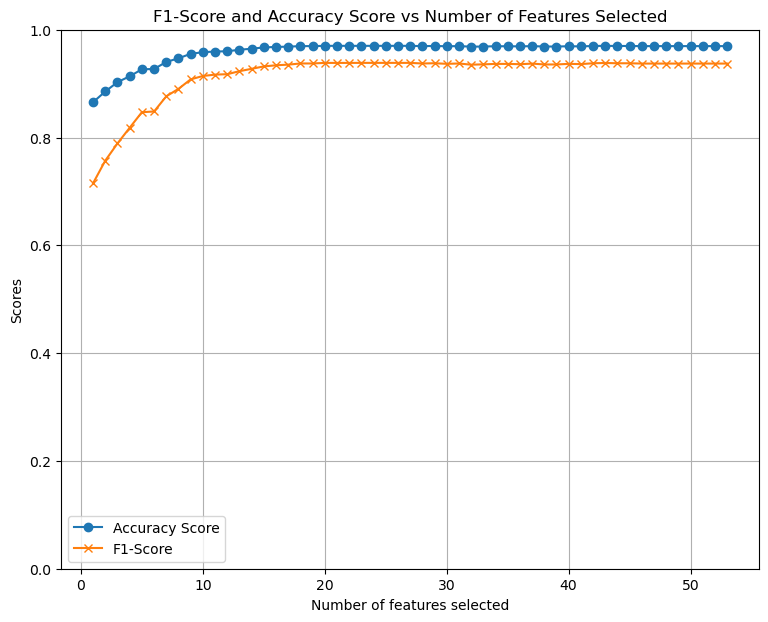

In [119]:
# plotting the scores in line graph
import matplotlib.pyplot as plt

plt.figure(figsize=(9,7))
plt.plot(n_range, accuracy_score_rfe, label='Accuracy Score', marker='o')
plt.plot(n_range, f1_score_rfe, label='F1-Score', marker='x')
plt.ylim([0.0,1.0])
plt.title('F1-Score and Accuracy Score vs Number of Features Selected')
plt.xlabel('Number of features selected')
plt.ylabel('Scores')
plt.grid()
plt.legend(loc='best')
plt.show()

In [120]:
# Step 2.3-2 - Using RFE again for selected best number of features
# From above line graph, 18 number of features seems to perform the best in terms of both score maximization and feature minimisation.

selector_best = RFE(estimator=LogisticRegression(),n_features_to_select=18)
selector_best = selector_best.fit(X_train_logreg_scaled,y_train_logreg)
predicted_best = selector_best.predict(X_test_logreg_scaled)

supp = selector_best.get_support()

accuracy_score_best = accuracy_score(y_test_logreg, predicted_best)
f1_score_best = f1_score(y_test_logreg, predicted_best)

print("Accuracy score for best selected features: ",accuracy_score_best)
print("F1 score for best selected features: ",f1_score_best)
print()
print("Selected Features: ",feature_cols[supp])

Accuracy score for best selected features:  0.9695979899497488
F1 score for best selected features:  0.9374030005173306

Selected Features:  Index(['Age', 'BankruptcyHistory', 'CreditScore', 'EducationLevel_Associate',
       'EducationLevel_Doctorate', 'EducationLevel_High School',
       'EducationLevel_Master', 'EmploymentStatus_Unemployed',
       'HomeOwnershipStatus_Mortgage', 'HomeOwnershipStatus_Own',
       'InterestRate', 'LengthOfCreditHistory', 'LoanAmount', 'MonthlyIncome',
       'NetWorth', 'PaymentHistory', 'PreviousLoanDefaults',
       'TotalDebtToIncomeRatio'],
      dtype='object')


## Task 3: Build a KNN classification model (25 marks)

### Step 3.1 Build 1-NN classifier (5 marks)
1. Slect the features identifed in Step 2.3 for this task
2. Buid 1-NN classifier and report two classification performance metrics (accuracy and f1-score) on the testing data
3. Also report the two metrics on the training data, and compare the results with that of the testing data. Make a justification on whether the model is overfitting based on the comparison.

In [123]:
# Step 3.1-1 - selecting best features from RFE for model training
features_selected = feature_cols[supp]

X_train_bestfeat = X_train_logreg_scaled[features_selected]
X_test_bestfeat = X_test_logreg_scaled[features_selected]

# Step 3.1-2 - training the model using KNN=1 and predicting and evaluating it using testing data

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 1)
clf.fit(X_train_bestfeat, y_train_logreg)
y_pred_1nn = clf.predict(X_test_bestfeat)

print("Accuracy score for 1-NN: ", accuracy_score(y_test_logreg,y_pred_1nn))
print("F1-Score for 1-NN: ", f1_score(y_test_logreg,y_pred_1nn))

Accuracy score for 1-NN:  0.8801507537688442
F1-Score for 1-NN:  0.7472178060413355


In [124]:
# Step 3.1-3 - using training data for model prediction and evaluation

y_train_pred_1nn = clf.predict(X_train_bestfeat)

print("Accuracy score for 1-NN training data: ", accuracy_score(y_train_logreg,y_train_pred_1nn))
print("F1-Score for 1-NN training data: ", f1_score(y_train_logreg,y_train_pred_1nn))

Accuracy score for 1-NN training data:  1.0
F1-Score for 1-NN training data:  1.0


# Analysis and Explanation

The model is clearly over fitted as there is a very high difference of both f1-score and accuracy between training and testing dataset. Moreover, both the accuracy and f1-score for training dataset prediction is 1, indicating the model is essentially memorizing the dataset. 

These findings are further supported by the difference in f1-score between training(1.0) and testing(0.74) dataset, which suggests the model performs poorely when faced with unseen data. 

To mitigate this, one approach is to tune the hyperparameter K in KNN classification. Furthermore, we can use grid search and cross validation techniques to identify the optimal K-value and prevent overfitting.

### Step 3.2 Use the grid search and cross validation techniques to study the performance change with respect to the hyperparameter K (10 marks)
1. User grid search to search K in the range (1, 30) both inclusive with 5-fold cross validation. The performance metric used for search is accuracy.
2. Visualise the performance change with respect to K using a line chart. Report the two performance metrics for the best case.

In [127]:
# Step 3.2-1 - using gridsearch to select best value for knn

from sklearn.model_selection import GridSearchCV
parameter_grid = {'n_neighbors': range(1,31)}

knn_clf = KNeighborsClassifier()
clf = GridSearchCV(knn_clf, parameter_grid, scoring='accuracy', cv=5)
clf.fit(X_train_bestfeat,y_train_logreg)

print("Best K value: ", clf.best_params_["n_neighbors"])
print("Accuracy: ",clf.best_score_)

Best K value:  7
Accuracy:  0.9020728643216082


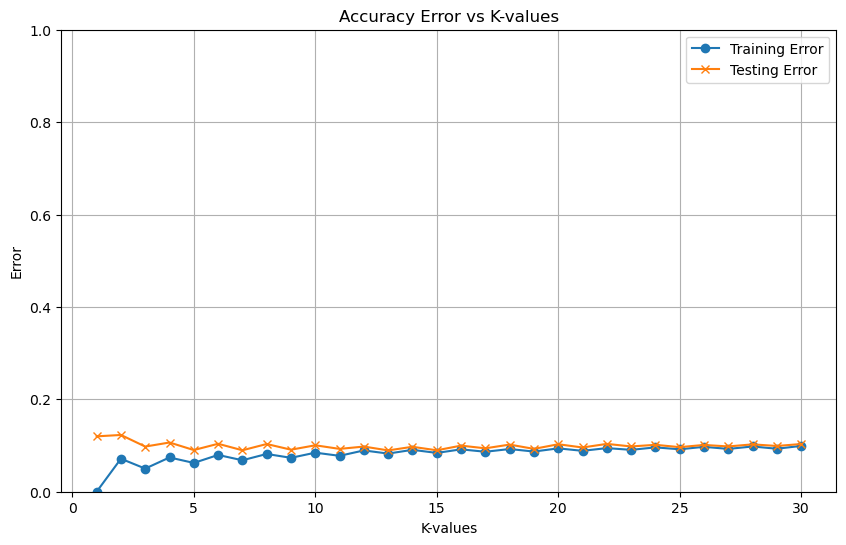

In [128]:
# Step 3.2-2 - Calculating different knn values for comparision and visualization

training_error = []
testing_error = []
knn_range = range(1,31)

for i in knn_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_bestfeat,y_train_logreg)
    training_error.append(1.0-accuracy_score(y_train_logreg,knn.predict(X_train_bestfeat)))
    testing_error.append(1.0-accuracy_score(y_test_logreg, knn.predict(X_test_bestfeat)))

plt.figure(figsize=(10,6))
plt.ylim([0.0,1.0])
plt.plot(knn_range,training_error,label='Training Error',marker='o')
plt.plot(knn_range,testing_error,label='Testing Error',marker='x')
plt.title('Accuracy Error vs K-values')
plt.xlabel('K-values')
plt.ylabel('Error')
plt.grid()
plt.legend(loc='best')
plt.show()

In [129]:
# Testing the best K-value produced by gridsearch

knn_clf_best = KNeighborsClassifier(n_neighbors=7)
knn_clf_best.fit(X_train_bestfeat, y_train_logreg)
knn_clf_best_predict = knn_clf_best.predict(X_test_bestfeat)

print("Accuracy score for best k-value: ", accuracy_score(y_test_logreg,knn_clf_best_predict))
print("F1 score for best k-value: ", f1_score(y_test_logreg,knn_clf_best_predict))

Accuracy score for best k-value:  0.9103015075376885
F1 score for best k-value:  0.7954154727793696


### Step 3.3 Study how the distance metrics affect the model performance (10 marks)
1. Change the distance metric parameter to 3 distance types: 'euclidean'(also l2), 'l1', and 'cosine', respectively, and visualise the model performance with these 3 distances, using a bar chart for both accuracy and f1 scores.
2. Compare the performance metrics, which is the best? Which is the worest?

In [131]:
# Step 3.3-1 - using different distance metric parameters

# Euclidean(l2) distance
knn_euclidean = KNeighborsClassifier(n_neighbors=7,
                                    metric='euclidean').fit(X_train_bestfeat, y_train_logreg)
knn_euclidean_predict = knn_euclidean.predict(X_test_bestfeat)

accuracy_euclidean = accuracy_score(y_test_logreg, knn_euclidean_predict)
f1_euclidean = f1_score(y_test_logreg, knn_euclidean_predict)

print("Accuracy score for euclidean distance: ",accuracy_euclidean)
print("F1 score for euclidean distance: ", f1_euclidean)

Accuracy score for euclidean distance:  0.9103015075376885
F1 score for euclidean distance:  0.7954154727793696


In [132]:
# l1
knn_l1 = KNeighborsClassifier(n_neighbors=7,
                                metric='l1').fit(X_train_bestfeat, y_train_logreg)
knn_l1_predict = knn_l1.predict(X_test_bestfeat)

accuracy_l1 = accuracy_score(y_test_logreg, knn_l1_predict)
f1_l1 = f1_score(y_test_logreg, knn_l1_predict)

print("Accuracy score for l1 distance: ", accuracy_l1)
print("F1 score for l1 distance: ", f1_l1)

Accuracy score for l1 distance:  0.91356783919598
F1 score for l1 distance:  0.8065241844769404


In [133]:
#cosine
knn_cosine = KNeighborsClassifier(n_neighbors=7,
                                 metric='cosine').fit(X_train_bestfeat, y_train_logreg)
knn_cosine_predict = knn_cosine.predict(X_test_bestfeat)

accuracy_cosine = accuracy_score(y_test_logreg, knn_cosine_predict)
f1_cosine = f1_score(y_test_logreg, knn_cosine_predict)

print("Accuracy score for cosine distance: ", accuracy_cosine)
print("F1 score for cosine distance: ", f1_cosine)

Accuracy score for cosine distance:  0.9180904522613065
F1 score for cosine distance:  0.8212719298245614


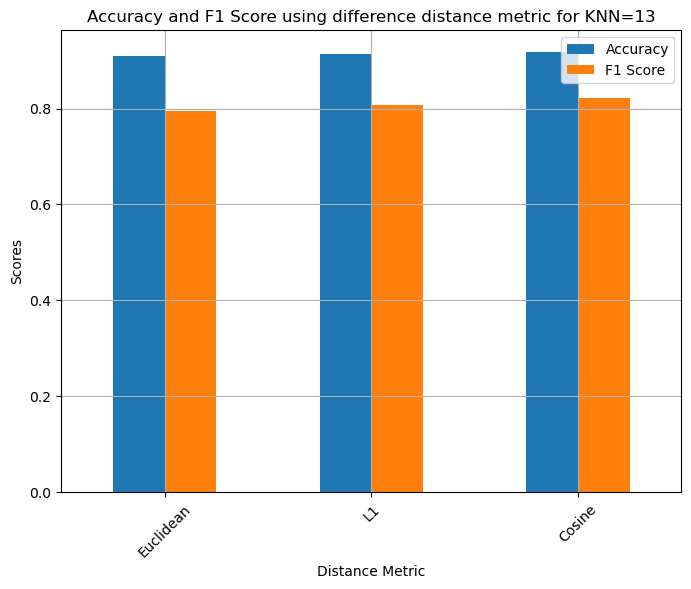

In [134]:
# Plotting the three scores
performance_data = pd.DataFrame({
    'Accuracy' : [accuracy_euclidean, accuracy_l1, accuracy_cosine],
    'F1 Score' : [f1_euclidean, f1_l1, f1_cosine]
})
distance_metric = ['Euclidean','L1','Cosine']

ax = performance_data.plot(kind='bar',figsize=(8,6))

ax.set_xticks(range(len(distance_metric)))
ax.set_xticklabels(distance_metric, rotation=45)


plt.title('Accuracy and F1 Score using difference distance metric for KNN=13')
plt.xlabel("Distance Metric")
plt.ylabel('Scores')
plt.grid()
plt.show()

## Analysis and Interpretation
From the above bargraph, we can see that all three distance metrices yield same accuracy score, likely due to imabalanced dataset. However, the F1-score varies slightly between the three metrics, with Cosine achieving the highest and Euclidean the lowest. This suggests that model with Cosine distance metric is the best, whereas, the model with Euclidean distance metric performs the worst.